# Circuit example from Homework 3

In [1]:
import time
import datetime
import math
import numpy as np
import sympy as sp
%matplotlib notebook
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.arithmetic import *
from qiskit import Aer # for simulating circuits
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
from qiskit import execute

from qiskit.utils import QuantumInstance
from qiskit.algorithms import Shor
from qiskit.circuit.library import QFT
from qiskit.circuit.library.standard_gates.swap import CSwapGate


In [ ]:
q = QuantumRegister(1, 'q') # specify the number of qubits in the register and a name

circ = QuantumCircuit(q)

In [ ]:
# Set up circuit
q = QuantumRegister(3, 'cat3')
circ = QuantumCircuit(q)

# Add gates
circ.h(q[0])
circ.cx(q[0], q[1])
circ.cx(q[0], q[2])

circ.draw()

In [ ]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
catstate = result.get_statevector(circ)
print('Statevector:', catstate)
print()
print('Probabilities:', np.abs(catstate)**2)

In [ ]:
c = ClassicalRegister(3, 'c')
circ.add_register(c)
circ.measure(q[0],c[0])
circ.measure(q[1],c[1])
circ.measure(q[2],c[2])

backend = BasicAer.get_backend('qasm_simulator')
job = execute(circ, backend, shots=1000)
result = job.result()

counts = result.get_counts()
print(counts)
#plot_histogram(counts)

# Multiplier 

In [ ]:
# Initialize circuit
SIZE = 4 # Number of Qubits for multiply inputs

a = QuantumRegister(SIZE, 'a')
b = QuantumRegister(SIZE, 'b')
c = QuantumRegister(2*SIZE, 'c')
aux = QuantumRegister(1, 'aux')
circ = QuantumCircuit(a, b, c, aux)

# Set some input state
# a = 3
circ.x(a[0:1+1])
# b = superposition of 2 and 3
circ.h(b[0])
circ.x(b[1])

# Add the multiplier
mult = HRSCumulativeMultiplier(SIZE, name='mult')
circ.append(mult, a[:]+b[:]+c[:]+aux[:])

# Add output measurements
outReg = ClassicalRegister(2*SIZE, 'output')
circ.add_register(outReg)
circ.measure(c, outReg)

circ.draw()

## QASM Simulation

In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circ, backend, shots=1024)
result = job.result()

counts = result.get_counts()
print('Counts = {c}'.format(c=counts))
plot_histogram(counts)

# Provided Shor

In [303]:
backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
shor = Shor(quantum_instance=quantum_instance)

circ = shor.construct_circuit(N=15, a=13)
circ.decompose().decompose().draw()

┌─────────────┐┌─────────────────────────────┐»
  up_0: ┤ U3(π/2,0,π) ├┤0                            ├»
        ├─────────────┤│                             │»
  up_1: ┤ U3(π/2,0,π) ├┤                             ├»
        ├─────────────┤│                             │»
  up_2: ┤ U3(π/2,0,π) ├┤                             ├»
        ├─────────────┤│                             │»
  up_3: ┤ U3(π/2,0,π) ├┤                             ├»
        ├─────────────┤│                             │»
  up_4: ┤ U3(π/2,0,π) ├┤                             ├»
        ├─────────────┤│                             │»
  up_5: ┤ U3(π/2,0,π) ├┤                             ├»
        ├─────────────┤│                             │»
  up_6: ┤ U3(π/2,0,π) ├┤                             ├»
        ├─────────────┤│                             │»
  up_7: ┤ U3(π/2,0,π) ├┤                             ├»
        └─┬──────────┬┘│                             │»
down_0: ──┤ U(π,0,π) ├─┤1                            ├»
          └──────────┘ │  ccphi_add_a_mod_N-12201448 │»
down_1: ───────────────┤                             ├»
                       │                             │»
down_2: ───────────────┤                             ├»
                       │                             │»
down_3: ───────────────┤                             ├»
            ┌──────┐   │                             │»
 aux_0: ────┤0     ├───┤2                            ├»
            │      │   │                             │»
 aux_1: ────┤1     ├───┤3                            ├»
            │      │   │                             │»
 aux_2: ────┤2 QFT ├───┤4                            ├»
            │      │   │                             │»
 aux_3: ────┤3     ├───┤5                            ├»
            │      │   │                             │»
 aux_4: ────┤4     ├───┤6                            ├»
            └──────┘   │                             │»
 aux_5: ───────────────┤7                            ├»
                       └─────────────────────────────┘»
«        ┌─────────────────────────────┐┌─────────────────────────────┐»
«  up_0: ┤0                            ├┤0                            ├»
«        │                             ││                             │»
«  up_1: ┤                             ├┤                             ├»
«        │                             ││                             │»
«  up_2: ┤                             ├┤                             ├»
«        │                             ││                             │»
«  up_3: ┤                             ├┤                             ├»
«        │                             ││                             │»
«  up_4: ┤                             ├┤                             ├»
«        │                             ││                             │»
«  up_5: ┤                             ├┤                             ├»
«        │                             ││                             │»
«  up_6: ┤                             ├┤                             ├»
«        │                             ││                             │»
«  up_7: ┤                             ├┤                             ├»
«        │                             ││                             │»
«down_0: ┤                             ├┤                             ├»
«        │  ccphi_add_a_mod_N-12201451 ││  ccphi_add_a_mod_N-12201454 │»
«down_1: ┤1                            ├┤                             ├»
«        │                             ││                             │»
«down_2: ┤                             ├┤1                            ├»
«        │                             ││                             │»
«down_3: ┤                             ├┤                             ├»
«        │                             ││                             │»
« aux_0: ┤2                            ├┤2                            ├»
«        │                            

In [ ]:
start_time = time.time()

N = 21
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = shor.factor(N)

elapsed_time = time.time() - start_time
print("Elapsed time:", datetime.timedelta(seconds=elapsed_time))

In [ ]:
print("Actual number of qubits of circuit: ", shor.construct_circuit(21).num_qubits)

In [ ]:
backend.available_devices()

In [ ]:
print("Factors of", N, ":", result.factors[0])

# Classical Implementation of Shor's Algorithm

In [ ]:
def classical_shor(a, N):
    remainder = 0
    r = 1
    start_time = time.time()
    current_time = start_time
    while ((remainder == 0) or (remainder != 1)):
        remainder = (a**r) % N
        r += 1
        sub_elapsed_time = time.time() - current_time
        if (sub_elapsed_time > 300):
            total_elapsed_time = time.time() - start_time
            print("r=", r, "elapsed time:", datetime.timedelta(seconds=total_elapsed_time))
            current_time = time.time()


    r -= 1

    #print("a=", a, "r=", r, "remainder=", remainder)

    if (r % 2 == 0):
        x = a**(int(r/2)) % N
        if ((x + 1) != (0 % N)):
            x = int(x)
            print("gcd(x+1,N):", math.gcd(x+1,N))
            print("gcd(x-1,N):", math.gcd(x-1,N))
            print("r=", r)
        else:
            print("Try another a")
    else:
        print("Try another a")
        

In [ ]:
def my_randprime(n):
    return sp.randprime(2,2**n)

In [ ]:
#n = 4 # number of bits of prime factors

for n in range(4,20):
    prime_1 = my_randprime(n)
    prime_2 = my_randprime(n)
    N = prime_1 * prime_2
    a = my_randprime(n)
    while (math.gcd(a, N) != 1):
        a = my_randprime(n)
    
    print("n=", n)
    print("N=", N)
    
    start = time.time()
    classical_shor(a, N)
    elapsed_time = time.time() - start

    print("Elapsed time:", datetime.timedelta(seconds=elapsed_time))
    print("---------")

# Quantum Implementation

In [2]:
def myQFT(n, inverse=False, do_swaps=False):
    if (inverse):
        return QFT(num_qubits=n, inverse=True, do_swaps=do_swaps, name='IQFT')
    else:
        return QFT(num_qubits=n, inverse=False, do_swaps=do_swaps, name='QFT')

In [3]:
def ADD(n, a):
    q = QuantumRegister(n, 'q')
    qc = QuantumCircuit(q)

    for i in range(1, n+1):
        phi = ((2*np.pi)/(2**i)) * a
        qc.rz(phi=phi, qubit=q[i-1])
    
    return qc.to_gate(label='ADD')

In [122]:
def CMOD_ADD(n, a, N):
    c = QuantumRegister(2, 'c')
    q = QuantumRegister(n, 'q')
    aux = QuantumRegister(2, 'aux')

    qc = QuantumCircuit(c, q, aux)


    qubit_list = [c[0], c[1]]
    for i in range(n):
        qubit_list.append(q[i])
    qubit_list.append(aux[0])

    qc.append(ADD(n+1, a).control(2), qubit_list)
    
    qubit_qft = []
    for i in range(n):
        qubit_qft.append(q[i])
    qubit_qft.append(aux[0])
    
    qc.append(ADD(n+1, N).inverse(), qubit_qft)

    iqft0 = myQFT(n+1, inverse=True)
    qc.append(iqft0, qubit_qft)

    qc.cx(aux[0], aux[1])

    qft1 = myQFT(n+1)
    qc.append(qft1, qubit_qft)

    qubit_list = [aux[1]]
    for i in range(n):
        qubit_list.append(q[i])
    qubit_list.append(aux[0])

    qc.append(ADD(n+1, N).control(1), qubit_list)

    # for cleaning aux


    qubit_list = [c[0], c[1]]
    for i in range(n):
        qubit_list.append(q[i]) 
    qubit_list.append(aux[0])

    qc.append(ADD(n+1, a).inverse().control(2), qubit_list)

    iqft1 = myQFT(n+1, inverse=True)
    qc.append(iqft1, qubit_qft)

    qc.x(aux[0])
    qc.cx(aux[0], aux[1])
    qc.x(aux[0])

    qft2 = myQFT(n+1)
    qc.append(qft2, qubit_qft)

    qubit_list = [c[0], c[1]]
    for i in range(n):
        qubit_list.append(q[i]) 
    qubit_list.append(aux[0])

    qc.append(ADD(n+1, a).control(2), qubit_list)

    
    return qc.to_instruction(label='CMOD_ADD')
    
    

In [304]:
def CMULT(n, a, N):
    b = QuantumRegister(n, 'b')
    x = QuantumRegister(n, 'x')
    aux = QuantumRegister(2, 'aux')
    c = QuantumRegister(1, 'c')

    # create a list of qubits to pass as qargs into append(controlled MOD_ADD)
    # append can't seem to recognize [q, aux] as n+1 bits

    
    qubit_madd = [c[0]]
    for i in range(n):
        qubit_madd.append(b[i])
    qubit_madd.append(aux[0])
    qubit_madd.append(aux[1])

    qc = QuantumCircuit(c, x, b, aux)
    
    qubit_qft = []
    for i in range(n):
        qubit_qft.append(b[i])
    qubit_qft.append(aux[0])
    
    qft_init = myQFT(n+1)
    qc.append(qft_init, qubit_qft)

    for i in range(n):
        qubit_cmadd = qubit_madd.copy()
        qubit_cmadd.insert(1, x[i])
        qc.append(CMOD_ADD(n, (2**i)*a % N, N), qubit_cmadd)
        
    iqft_last = myQFT(n+1, inverse=True)
    qc.append(iqft_last, qubit_qft)
        
        
    return qc.to_instruction(label='CMULT')



In [305]:
def U(n, a, i, N):
    label = "U()" + str(a) + "^(2^" + str(i) + ")"  

    a = a**(2**i)
    
    x = QuantumRegister(n, 'x')
    b = QuantumRegister(n, 'b')
    aux = QuantumRegister(2, 'aux')
    c = QuantumRegister(1, 'c')

    qc = QuantumCircuit(c, x, b, aux)
    
    qubit_mult = [c[0]]
    for i in range(n):
        qubit_mult.append(x[i])
    for i in range(n):
        qubit_mult.append(b[i])
    qubit_mult.append(aux[0])
    qubit_mult.append(aux[1])

    qc.append(CMULT(n, a, N), qubit_mult)

    for i in range(n):
        qc.append(CSwapGate(), [c[0], x[i], b[i]])

    a_inv = pow(a, -1, N)
    qc.append(CMULT(n, 1/pow(a, 1, N), N).inverse(), qubit_mult)
    
    return qc.to_instruction(label=label)


In [312]:
n = 4
N = 15

a = 2   # must be < N
x_val = 1

In [317]:
x = QuantumRegister(2*n, 'x')
w = QuantumRegister(n, 'w')
b = QuantumRegister(n, 'b')
aux = QuantumRegister(2, 'aux')

        
cl_x = ClassicalRegister(2*n, 'cl_x')
cl_w = ClassicalRegister(n, 'cl_w')


qc = QuantumCircuit(x, w, b, aux)
qc.add_register(cl_w)
qc.add_register(cl_x)


# init_x = format(x_val, '05b')
# print(init_x)
# for i in range(n):
#     if (init_x[n-1-i] == '1'):
#         qc.x(x[i])

qc.h(x)
qc.x(w[0])

qubit_u = []
for i in range(n):
    qubit_u.append(w[i])
for i in range(n):
    qubit_u.append(b[i])
qubit_u.append(aux[0])
qubit_u.append(aux[1])

for i in range(2*n):
    qubit_u_single = qubit_u.copy()
    qubit_u_single.insert(0, x[2*n-1-i])
    qc.append(U(n, a, i, N), qubit_u_single)

# qc.measure(w, cl1)
    

qc.append(myQFT(2*n, inverse=True), x)

# qc.measure(w, cl_w)
qc.measure(x, cl_x)

qc.draw()

┌───┐                                                                »
   x_0: ┤ H ├────────────────────────────────────────────────────────────────»
        ├───┤                                                                »
   x_1: ┤ H ├────────────────────────────────────────────────────────────────»
        ├───┤                                                                »
   x_2: ┤ H ├────────────────────────────────────────────────────────────────»
        ├───┤                                                                »
   x_3: ┤ H ├────────────────────────────────────────────────────────────────»
        ├───┤                                                ┌──────────────┐»
   x_4: ┤ H ├────────────────────────────────────────────────┤0             ├»
        ├───┤                                ┌──────────────┐│              │»
   x_5: ┤ H ├────────────────────────────────┤0             ├┤              ├»
        ├───┤                ┌──────────────┐│              ││              │»
   x_6: ┤ H ├────────────────┤0             ├┤              ├┤              ├»
        ├───┤┌──────────────┐│              ││              ││              │»
   x_7: ┤ H ├┤0             ├┤              ├┤              ├┤              ├»
        ├───┤│              ││              ││              ││              │»
   w_0: ┤ X ├┤1             ├┤1             ├┤1             ├┤1             ├»
        └───┘│              ││              ││              ││              │»
   w_1: ─────┤2             ├┤2             ├┤2             ├┤2             ├»
             │              ││              ││              ││              │»
   w_2: ─────┤3             ├┤3             ├┤3             ├┤3             ├»
             │              ││              ││              ││   U()2^(2^3) │»
   w_3: ─────┤4             ├┤4             ├┤4  U()2^(2^2) ├┤4             ├»
             │              ││   U()2^(2^1) ││              ││              │»
   b_0: ─────┤5  U()2^(2^0) ├┤5             ├┤5             ├┤5             ├»
             │              ││              ││              ││              │»
   b_1: ─────┤6             ├┤6             ├┤6             ├┤6             ├»
             │              ││              ││              ││              │»
   b_2: ─────┤7             ├┤7             ├┤7             ├┤7             ├»
             │              ││              ││              ││              │»
   b_3: ─────┤8             ├┤8             ├┤8             ├┤8             ├»
             │              ││              ││              ││              │»
 aux_0: ─────┤9             ├┤9             ├┤9             ├┤9             ├»
             │              ││              ││              ││              │»
 aux_1: ─────┤10            ├┤10            ├┤10            ├┤10            ├»
             └──────────────┘└──────────────┘└──────────────┘└──────────────┘»
cl_w: 4/═════════════════════════════════════════════════════════════════════»
                                                                             »
cl_x: 8/═════════════════════════════════════════════════════════════════════»
                                                                             »
«                                                        ┌──────────────┐»
«   x_0: ────────────────────────────────────────────────┤0             ├»
«                                        ┌──────────────┐│              │»
«   x_1: ────────────────────────────────┤0             ├┤              ├»
«                        ┌──────────────┐│              ││              │»
«   x_2: ────────────────┤0             ├┤              ├┤              ├»
«        ┌──────────────┐│              ││              ││              │»
«   x_3: ┤0             ├┤              ├┤              ├┤              ├»
«        │              ││              ││              ││              │»
«   x_4: ┤              ├┤              ├┤              ├┤              ├»
«        │         

[('11000000 0000', 271), ('00000000 0000', 262), ('01000000 0000', 236), ('10000000 0000', 231)]


<IPython.core.display.Javascript object>


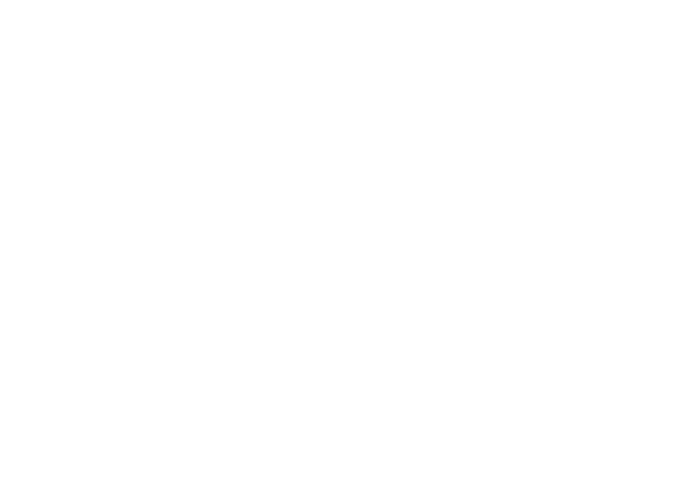

<IPython.core.display.Javascript object>


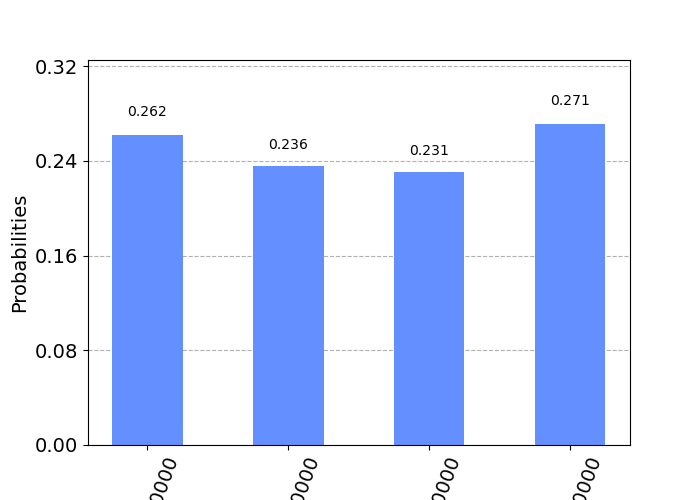

In [318]:
# qc.save_statevector()

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()

counts = result.get_counts()
# statevector = result.get_statevector()
sort_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)

print(sort_counts)
plot_histogram(counts)

# Scratch

In [294]:
x = QuantumRegister(n, 'x')
b = QuantumRegister(n, 'b')
c = QuantumRegister(1, 'c')
aux = QuantumRegister(2, 'aux')

cl_x = ClassicalRegister(n, 'cl_x')
cl_b = ClassicalRegister(n, 'cl_b')
cl_aux = ClassicalRegister(2, 'cl_aux')

qc = QuantumCircuit(c, x, b, aux)
qc.add_register(cl_x)
qc.add_register(cl_b)
qc.add_register(cl_aux)

init_x = format(x_val, '05b')
print(init_x)
for i in range(n):
    if (init_x[n-1-i] == '1'):
        qc.x(x[i])

qc.x(c)
qc.x(x[0])


qubit_mult = [c[0]]
for i in range(n):
    qubit_mult.append(x[i])
for i in range(n):
    qubit_mult.append(b[i])
qubit_mult.append(aux[0])
qubit_mult.append(aux[1])

qc.append(CMULT(n, a, N), qubit_mult)

for i in range(n):
    qc.append(CSwapGate(), [c[0], x[i], b[i]])

a_inv = pow(a, -1, N)
print(a_inv)
print(pow(a_inv * pow(a, 1, N), 1, N))
qc.append(CMULT(n, a_inv, N).inverse(), qubit_mult)

qc.measure(x, cl_x)
qc.measure(b, cl_b)
qc.measure(aux, cl_aux)

qc.draw()

00001


┌───┐┌───────────────────────┐                              
       c: ┤ X ├┤0                      ├──────────────────────────────
          ├───┤│                       │┌─┐                           
     x_0: ┤ X ├┤1                      ├┤M├───────────────────────────
          └───┘│                       │└╥┘┌─┐                        
     x_1: ─────┤2                      ├─╫─┤M├────────────────────────
               │                       │ ║ └╥┘┌─┐                     
     x_2: ─────┤3                      ├─╫──╫─┤M├─────────────────────
               │                       │ ║  ║ └╥┘┌─┐                  
     x_3: ─────┤4                      ├─╫──╫──╫─┤M├──────────────────
               │                       │ ║  ║  ║ └╥┘┌─┐               
     b_0: ─────┤5  circuit-11777354_dg ├─╫──╫──╫──╫─┤M├───────────────
               │                       │ ║  ║  ║  ║ └╥┘┌─┐            
     b_1: ─────┤6                      ├─╫──╫──╫──╫──╫─┤M├────────────
               │                       │ ║  ║  ║  ║  ║ └╥┘┌─┐         
     b_2: ─────┤7                      ├─╫──╫──╫──╫──╫──╫─┤M├─────────
               │                       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
     b_3: ─────┤8                      ├─╫──╫──╫──╫──╫──╫──╫─┤M├──────
               │                       │ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
   aux_0: ─────┤9                      ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
               │                       │ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   aux_1: ─────┤10                     ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
               └───────────────────────┘ ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
  cl_x: 4/═══════════════════════════════╩══╩══╩══╩══╬══╬══╬══╬══╬══╬═
                                         0  1  2  3  ║  ║  ║  ║  ║  ║ 
                                                     ║  ║  ║  ║  ║  ║ 
  cl_b: 4/═══════════════════════════════════════════╩══╩══╩══╩══╬══╬═
                                                     0  1  2  3  ║  ║ 
                                                                 ║  ║ 
cl_aux: 2/═══════════════════════════════════════════════════════╩══╩═
                                                                 0  1

In [104]:
# plot_bloch_multivector(statevector)


In [133]:
c = QuantumRegister(2, 'c')
q = QuantumRegister(n, 'q')
aux = QuantumRegister(2, 'aux')
cl = ClassicalRegister(n, 'cl')
qc = QuantumCircuit(c, q, aux)

qc.x(c)

qubit_qft = []
for i in range(n):
    qubit_qft.append(q[i])
qubit_qft.append(aux[0])

qft_init = myQFT(n+1)
qc.append(qft_init, qubit_qft)

qubit_list = [c[0], c[1]]
for i in range(n):
    qubit_list.append(q[i])
qubit_list.append(aux[0])

qc.append(ADD(n+1, a).control(2), qubit_list)

qc.append(ADD(n+1, N).inverse(), qubit_qft)

iqft0 = myQFT(n+1, inverse=True)
qc.append(iqft0, qubit_qft)

qc.cx(aux[0], aux[1])

qft1 = myQFT(n+1)
qc.append(qft1, qubit_qft)

qubit_list = [aux[1]]
for i in range(n):
    qubit_list.append(q[i])
qubit_list.append(aux[0])

qc.append(ADD(n+1, N).control(1), qubit_list)

# for cleaning aux


qubit_list = [c[0], c[1]]
for i in range(n):
    qubit_list.append(q[i]) 
qubit_list.append(aux[0])

qc.append(ADD(n+1, a).inverse().control(2), qubit_list)

iqft1 = myQFT(n+1, inverse=True)
qc.append(iqft1, qubit_qft)

qc.x(aux[0])
qc.cx(aux[0], aux[1])
qc.x(aux[0])

qft2 = myQFT(n+1)
qc.append(qft2, qubit_qft)

qubit_list = [c[0], c[1]]
for i in range(n):
    qubit_list.append(q[i]) 
qubit_list.append(aux[0])

qc.append(ADD(n+1, a).control(2), qubit_list)

qft_last = myQFT(n+1, inverse=True)
qc.append(qft_last, qubit_qft)

qc.add_register(cl)



qc.measure(q, cl)
qc.draw()

┌───┐                                                               »
  c_0: ─┤ X ├─────■─────────────────────────────────────────────────────────»
        ├───┤     │                                                         »
  c_1: ─┤ X ├─────■─────────────────────────────────────────────────────────»
       ┌┴───┴─┐┌──┴───┐┌─────────────────────┐┌───────┐     ┌──────┐┌──────┐»
  q_0: ┤0     ├┤0     ├┤0                    ├┤0      ├─────┤0     ├┤0     ├»
       │      ││      ││                     ││       │     │      ││      │»
  q_1: ┤1     ├┤1     ├┤1                    ├┤1      ├─────┤1     ├┤1     ├»
       │      ││      ││                     ││       │     │      ││      │»
  q_2: ┤2 QFT ├┤2 ADD ├┤2 circuit-4575879_dg ├┤2 IQFT ├─────┤2 QFT ├┤2 ADD ├»
       │      ││      ││                     ││       │     │      ││      │»
  q_3: ┤3     ├┤3     ├┤3                    ├┤3      ├─────┤3     ├┤3     ├»
       │      ││      ││                     ││       │     │      ││      │»
aux_0: ┤4     ├┤4     ├┤4                    ├┤4      ├──■──┤4     ├┤4     ├»
       └──────┘└──────┘└─────────────────────┘└───────┘┌─┴─┐└──────┘└──┬───┘»
aux_1: ────────────────────────────────────────────────┤ X ├───────────■────»
                                                       └───┘                »
 cl: 4/═════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                                      »
«  c_0: ───────────■──────────────────────────────────────────────■────»
«                  │                                              │    »
«  c_1: ───────────■──────────────────────────────────────────────■────»
«       ┌──────────┴──────────┐┌───────┐               ┌──────┐┌──┴───┐»
«  q_0: ┤0                    ├┤0      ├───────────────┤0     ├┤0     ├»
«       │                     ││       │               │      ││      │»
«  q_1: ┤1                    ├┤1      ├───────────────┤1     ├┤1     ├»
«       │                     ││       │               │      ││      │»
«  q_2: ┤2 circuit-4575904_dg ├┤2 IQFT ├───────────────┤2 QFT ├┤2 ADD ├»
«       │                     ││       │               │      ││      │»
«  q_3: ┤3                    ├┤3      ├───────────────┤3     ├┤3     ├»
«       │                     ││       │┌───┐     ┌───┐│      ││      │»
«aux_0: ┤4                    ├┤4      ├┤ X ├──■──┤ X ├┤4     ├┤4     ├»
«       └─────────────────────┘└───────┘└───┘┌─┴─┐└───┘└──────┘└──────┘»
«aux_1: ─────────────────────────────────────┤ X ├─────────────────────»
«                                            └───┘                     »
« cl: 4/═══════════════════════════════════════════════════════════════»
«                                                                      »
«                            
«  c_0: ─────────────────────
«                            
«  c_1: ─────────────────────
«       ┌───────┐┌─┐         
«  q_0: ┤0      ├┤M├─────────
«       │       │└╥┘┌─┐      
«  q_1: ┤1      ├─╫─┤M├──────
«       │       │ ║ └╥┘┌─┐   
«  q_2: ┤2 IQFT ├─╫──╫─┤M├───
«       │       │ ║  ║ └╥┘┌─┐
«  q_3: ┤3      ├─╫──╫──╫─┤M├
«       │       │ ║  ║  ║ └╥┘
«aux_0: ┤4      ├─╫──╫──╫──╫─
«       └───────┘ ║  ║  ║  ║ 
«aux_1: ──────────╫──╫──╫──╫─
«                 ║  ║  ║  ║ 
« cl: 4/══════════╩══╩══╩══╩═
«                 0  1  2  3